In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [2]:

import pandas as pd
import numpy as np
from datetime import datetime

CRIME = pd.read_csv("/content/drive/MyDrive/crime.csv", encoding='latin-1')
OFFENCE_CODES = pd.read_csv("/content/drive/MyDrive/offense_codes.csv", encoding='latin-1')

# Split the 'NAME' column by '-'
OFFENCE_CODES[['Name_Part1', 'Name_Part2']] = OFFENCE_CODES['NAME'].str.split('-', n=1, expand=True)

# Fill NaN values in 'Name_Part2' with empty strings
OFFENCE_CODES['Name_Part2'].fillna('', inplace=True)

# Remove the original 'NAME' column
OFFENCE_CODES = OFFENCE_CODES.drop('NAME', axis=1)

# Rename columns
OFFENCE_CODES = OFFENCE_CODES.rename(columns={'Name_Part1': 'NAME', 'Name_Part2': 'DESCRIPTION'})

# Display the updated DataFrame
OFFENCE_CODES

<ipython-input-2-4f61ff346d56>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  OFFENCE_CODES['Name_Part2'].fillna('', inplace=True)


,CODE,NAME,DESCRIPTION
0,612,LARCENY PURSE SNATCH,NO FORCE
1,613,LARCENY SHOPLIFTING,
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES,
3,1731,INCEST,
4,3111,LICENSE PREMISE VIOLATION,
...,...,...,...
571,1806,DRUGS,CLASS B TRAFFICKING OVER 18 GRAMS
572,1807,DRUGS,CLASS D TRAFFICKING OVER 50 GRAMS
573,1610,HUMAN TRAFFICKING,COMMERCIAL SEX ACTS
574,2010,HOME INVASION,


In [3]:

# Replace all spaces in the 'DESCRIPTION' column with "NO DESCRIPTION"
OFFENCE_CODES['DESCRIPTION'] = OFFENCE_CODES['DESCRIPTION'].replace(r'^\s*$', 'NO DESCRIPTION', regex=True)

# Display the updated DataFrame
OFFENCE_CODES

,CODE,NAME,DESCRIPTION
0,612,LARCENY PURSE SNATCH,NO FORCE
1,613,LARCENY SHOPLIFTING,NO DESCRIPTION
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES,NO DESCRIPTION
3,1731,INCEST,NO DESCRIPTION
4,3111,LICENSE PREMISE VIOLATION,NO DESCRIPTION
...,...,...,...
571,1806,DRUGS,CLASS B TRAFFICKING OVER 18 GRAMS
572,1807,DRUGS,CLASS D TRAFFICKING OVER 50 GRAMS
573,1610,HUMAN TRAFFICKING,COMMERCIAL SEX ACTS
574,2010,HOME INVASION,NO DESCRIPTION


In [4]:
# prompt: find duplicate codes in OFFENCE_CODES and sort by CODE

duplicate_codes = OFFENCE_CODES[OFFENCE_CODES.duplicated(subset=['CODE'], keep=False)]
sorted_duplicates = duplicate_codes.sort_values(by=['CODE'])
sorted_duplicates

,CODE,NAME,DESCRIPTION
183,111,MURDER NON,NEGLIGIENT MANSLAUGHTER
19,111,"MURDER, NON",NEGLIGIENT MANSLAUGHTER
184,112,KILLING OF FELON BY POLICE,NO DESCRIPTION
154,112,KILLING OF FELON BY POLICE,NO DESCRIPTION
185,114,KILLING OF POLICE BY FELON,NO DESCRIPTION
...,...,...,...
450,3503,MISSING PERSON,NOT REPORTED - LOCATED
487,3620,REPORT AFFECTING OTHER DEPTS.,NO DESCRIPTION
55,3620,REPORT AFFECTING OTHER DEPTS.,NO DESCRIPTION
117,3625,DANGEROUS OR HAZARDOUS CONDITION,NO DESCRIPTION


In [5]:
# prompt: remove duplicate rows of OFFENCE_CODES

OFFENCE_CODES = OFFENCE_CODES.drop_duplicates(subset=['CODE'], keep='first')
OFFENCE_CODES

,CODE,NAME,DESCRIPTION
0,612,LARCENY PURSE SNATCH,NO FORCE
1,613,LARCENY SHOPLIFTING,NO DESCRIPTION
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES,NO DESCRIPTION
3,1731,INCEST,NO DESCRIPTION
4,3111,LICENSE PREMISE VIOLATION,NO DESCRIPTION
...,...,...,...
571,1806,DRUGS,CLASS B TRAFFICKING OVER 18 GRAMS
572,1807,DRUGS,CLASS D TRAFFICKING OVER 50 GRAMS
573,1610,HUMAN TRAFFICKING,COMMERCIAL SEX ACTS
574,2010,HOME INVASION,NO DESCRIPTION


In [6]:
# prompt: merge CRIME and OFFENCE_CODES based on OFFENCE_CODE and CODE

merged_df = pd.merge(CRIME, OFFENCE_CODES, left_on='OFFENSE_CODE', right_on='CODE', how='left')
merged_df

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,CODE,NAME,DESCRIPTION
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",619,LARCENY ALL OTHERS,NO DESCRIPTION
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",1402,VANDALISM,NO DESCRIPTION
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",3410,TOWED MOTOR VEHICLE,NO DESCRIPTION
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",3114,INVESTIGATE PROPERTY,NO DESCRIPTION
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",3114,INVESTIGATE PROPERTY,NO DESCRIPTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",3125,WARRANT ARREST,NO DESCRIPTION
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",111,"MURDER, NON",NEGLIGIENT MANSLAUGHTER
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",3125,WARRANT ARREST,NO DESCRIPTION
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)",3125,WARRANT ARREST,NO DESCRIPTION


In [7]:
# prompt: remove CODE and NAME column and save the new table as CRIME

# Remove 'CODE' and 'NAME' columns
merged_df = merged_df.drop(['CODE', 'NAME'], axis=1)



In [8]:
CRIME = merged_df

# Display the updated DataFrame
CRIME

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,DESCRIPTION
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",NO DESCRIPTION
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",NO DESCRIPTION
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",NO DESCRIPTION
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",NO DESCRIPTION
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",NO DESCRIPTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",NO DESCRIPTION
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",NEGLIGIENT MANSLAUGHTER
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",NO DESCRIPTION
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)",NO DESCRIPTION


In [9]:
# prompt: remove YEAR, MONTH, HOUR, LOCATION columns

# Remove 'YEAR', 'MONTH', 'HOUR', and 'LOCATION' columns
CRIME = CRIME.drop(['YEAR', 'MONTH', 'HOUR', 'Location'], axis=1)

# Display the updated DataFrame
CRIME

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Lat,Long,DESCRIPTION
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,Sunday,Part One,LINCOLN ST,42.357791,-71.139371,NO DESCRIPTION
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,Tuesday,Part Two,HECLA ST,42.306821,-71.060300,NO DESCRIPTION
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,Monday,Part Three,CAZENOVE ST,42.346589,-71.072429,NO DESCRIPTION
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,Monday,Part Three,NEWCOMB ST,42.334182,-71.078664,NO DESCRIPTION
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,Monday,Part Three,DELHI ST,42.275365,-71.090361,NO DESCRIPTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,Sunday,Part Three,COVENTRY ST,42.336951,-71.085748,NO DESCRIPTION
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,Thursday,Part One,RIVER ST,42.255926,-71.123172,NEGLIGIENT MANSLAUGHTER
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,Thursday,Part Three,RIVER ST,42.255926,-71.123172,NO DESCRIPTION
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,Tuesday,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,NO DESCRIPTION


In [10]:
#show the schema of the data source
CRIME.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'DAY_OF_WEEK', 'UCR_PART', 'STREET', 'Lat', 'Long',
       'DESCRIPTION'],
      dtype='object')

In [11]:
#unique display the list of distinct values in a column
codes = CRIME['OFFENSE_CODE'].unique()
codes

array([ 619, 1402, 3410, 3114, 3820,  724, 3301,  301, 3108, 2647, 3201,
       3006, 3305,  614, 3801, 3803,  522, 3831,  802, 2007, 2900, 2907,
       2629, 2662, 3207,  613, 3109, 2612, 1843, 3125, 1841, 3802, 3018,
       2405,  617, 3625, 3106, 3501, 3115,  616, 3807, 1102, 1849, 2905,
       1810, 1842, 1806, 1848, 1844,  423, 3205,  413, 1501, 3001, 3830,
        561, 2914, 2610, 1109,  706, 2403, 3160,  900,  801, 3002,  520,
       2648,  670,  615, 3116, 1504, 1830,  361, 2006,  311, 1001, 3810,
       2401, 2646, 3821, 3811, 3007, 2660, 1831, 3119, 3170, 1874, 3112,
       3502,  735,  612,  560,  381, 3402, 1815, 1107, 2101, 1106, 3202,
       1503, 1846, 3016, 3304,  611, 2622, 3130, 2407, 2657, 3111, 3503,
       2906,  540, 3208, 1832,  521, 1847, 1510, 1850, 2010, 2616, 1304,
       2511, 2005, 1605, 3805, 1300, 2102, 3008, 2632, 3102, 1415,  542,
       2663, 1805, 3620, 2604,  371, 2204, 2619,  727,  804, 2003, 1845,
        111, 2613, 1201, 2617, 3123, 3110,  541, 26

In [12]:
codes_1 = OFFENCE_CODES['CODE'].unique()
codes_1

array([ 612,  613,  615, 1731, 3111, 2646, 2204, 3810, 3801, 3807, 3803,
       3805, 3802, 3205,  123,  121, 3501, 3502, 3503,  111, 3303, 2623,
       2628, 1711, 2007, 2102, 2660, 2900, 1109, 2616, 2606, 2636, 3029,
       3106, 1300, 3207, 3201, 3202, 3208, 1304, 1603, 1605, 1601, 1602,
        242,  254,  271,  244,  251,  241,  243,  261,  252,  253,  735,
       3620,  301,  311,  351,  361,  371,  381, 3403, 3109, 3110, 1730,
       3006,  801,  804, 1704, 2647, 3410, 2610, 2642, 2915, 2907, 2906,
       2905, 2914, 1402, 1415, 3301, 2657, 2641, 2006, 2663, 3125, 2511,
       2613, 3002, 3402,  802,  423,  413,  724,  727,  706,  541,  540,
        562,  561,  542,  521,  520,  522,  560, 2662, 2672, 2648, 2004,
       2003, 2608, 1106, 2617, 2605, 1001, 2670, 3625, 2405, 1825, 1815,
       1832, 1831, 2609, 1810, 1830, 1201, 2632, 2618, 3123, 2604, 1721,
       3160, 3108, 2612, 3016, 1501, 3203, 1503, 1502, 1102, 1107, 1108,
       2619, 1901, 3302, 3116, 1702, 1703, 3004, 31

In [13]:
OFFENCE_CODES['CODE'].nunique()

425

In [14]:
codes_1.shape

(425,)

In [15]:
all(item in codes_1 for item in codes)

True

In [16]:
#duplicated returns a boolean Series denoting the duplicate rows (exact matching)
DUPLICATES = CRIME.duplicated()
print(DUPLICATES.any())

True


In [17]:
CRIME[DUPLICATES]

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Lat,Long,DESCRIPTION
318745,I152030570-00,3125,Warrant Arrests,WARRANT ARREST,E13,303,NaN,2016-10-29 08:25:00,Saturday,Part Three,W WALNUT PARK,42.317207,-71.098799,NO DESCRIPTION
318752,I152026775-00,3115,Investigate Person,INVESTIGATE PERSON,C6,936,NaN,2015-10-19 16:04:00,Monday,Part Three,ORTON-MAROTTA WAY,42.338573,-71.055755,NO DESCRIPTION
318755,I152026488-00,3125,Warrant Arrests,WARRANT ARREST,A1,105,NaN,2017-01-31 10:00:00,Tuesday,Part Three,FRUIT ST,42.362403,-71.069547,NO DESCRIPTION
318781,I152006153-00,1849,Drug Violation,"DRUGS - POSS CLASS B - COCAINE, ETC.",C6,179,NaN,2015-09-16 11:30:00,Wednesday,Part Two,MASSACHUSETTS AVE,42.332531,-71.072130,"POSS CLASS B - COCAINE, ETC."
318785,I152004688-00,3125,Warrant Arrests,WARRANT ARREST,A1,120,NaN,2016-07-19 12:50:00,Tuesday,Part Three,BOYLSTON ST,42.352418,-71.065255,NO DESCRIPTION
318808,I142060752-00,2610,Other,TRESPASSING,B2,280,NaN,2015-12-11 12:50:00,Friday,Part Two,DUDLEY ST,42.328726,-71.083822,NO DESCRIPTION
318810,I142060752-00,3125,Warrant Arrests,WARRANT ARREST,B2,280,NaN,2015-12-11 12:50:00,Friday,Part Three,DUDLEY ST,42.328726,-71.083822,NO DESCRIPTION
318826,I142049917-00,1402,Vandalism,VANDALISM,C11,395,NaN,2015-09-03 13:00:00,Thursday,Part Two,DORCHESTER AVE,42.285260,-71.064441,NO DESCRIPTION
318866,I142025900-00,3125,Warrant Arrests,WARRANT ARREST,E13,577,NaN,2015-12-01 18:00:00,Tuesday,Part Three,AMORY ST,42.317713,-71.101805,NO DESCRIPTION
318887,I142017108-00,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,A1,64,NaN,2015-06-16 15:55:00,Tuesday,Part Two,FRUIT ST,42.362403,-71.069547,POSS CLASS A - INTENT TO MFR DIST DISP


In [18]:
CRIME.count()

,0
INCIDENT_NUMBER,319073
OFFENSE_CODE,319073
OFFENSE_CODE_GROUP,319073
OFFENSE_DESCRIPTION,319073
DISTRICT,317308
REPORTING_AREA,319073
SHOOTING,1019
OCCURRED_ON_DATE,319073
DAY_OF_WEEK,319073
UCR_PART,318983


In [19]:
CRIME.isnull().sum()

,0
INCIDENT_NUMBER,0
OFFENSE_CODE,0
OFFENSE_CODE_GROUP,0
OFFENSE_DESCRIPTION,0
DISTRICT,1765
REPORTING_AREA,0
SHOOTING,318054
OCCURRED_ON_DATE,0
DAY_OF_WEEK,0
UCR_PART,90


In [20]:
#total number of not null values
NOT_NULL = CRIME.count().sum()
CRIME.count().sum()

4096244

In [21]:
#total number of null values
NULL = CRIME.isnull().sum().sum()
CRIME.isnull().sum().sum()

370778

In [22]:
#total number of cells
TOT = CRIME.shape[0]*CRIME.shape[1]
TOT

4467022

In [23]:
COMPLETENESS = NOT_NULL / TOT
COMPLETENESS = '{0:.1f}%'.format(COMPLETENESS*100)
print(COMPLETENESS)

91.7%


In [24]:
!pip install sweetviz

In [25]:
import sweetviz as sv

                                             |          | [  0%]   00:00 -> (? left)


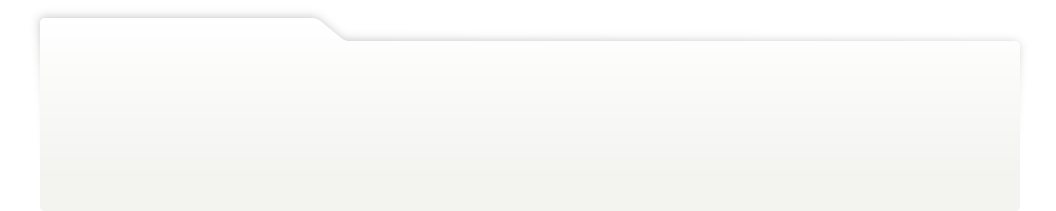
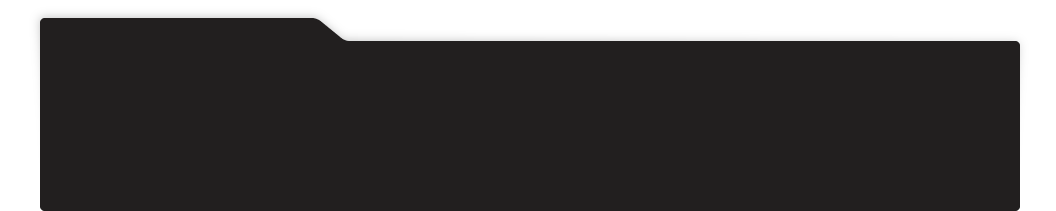
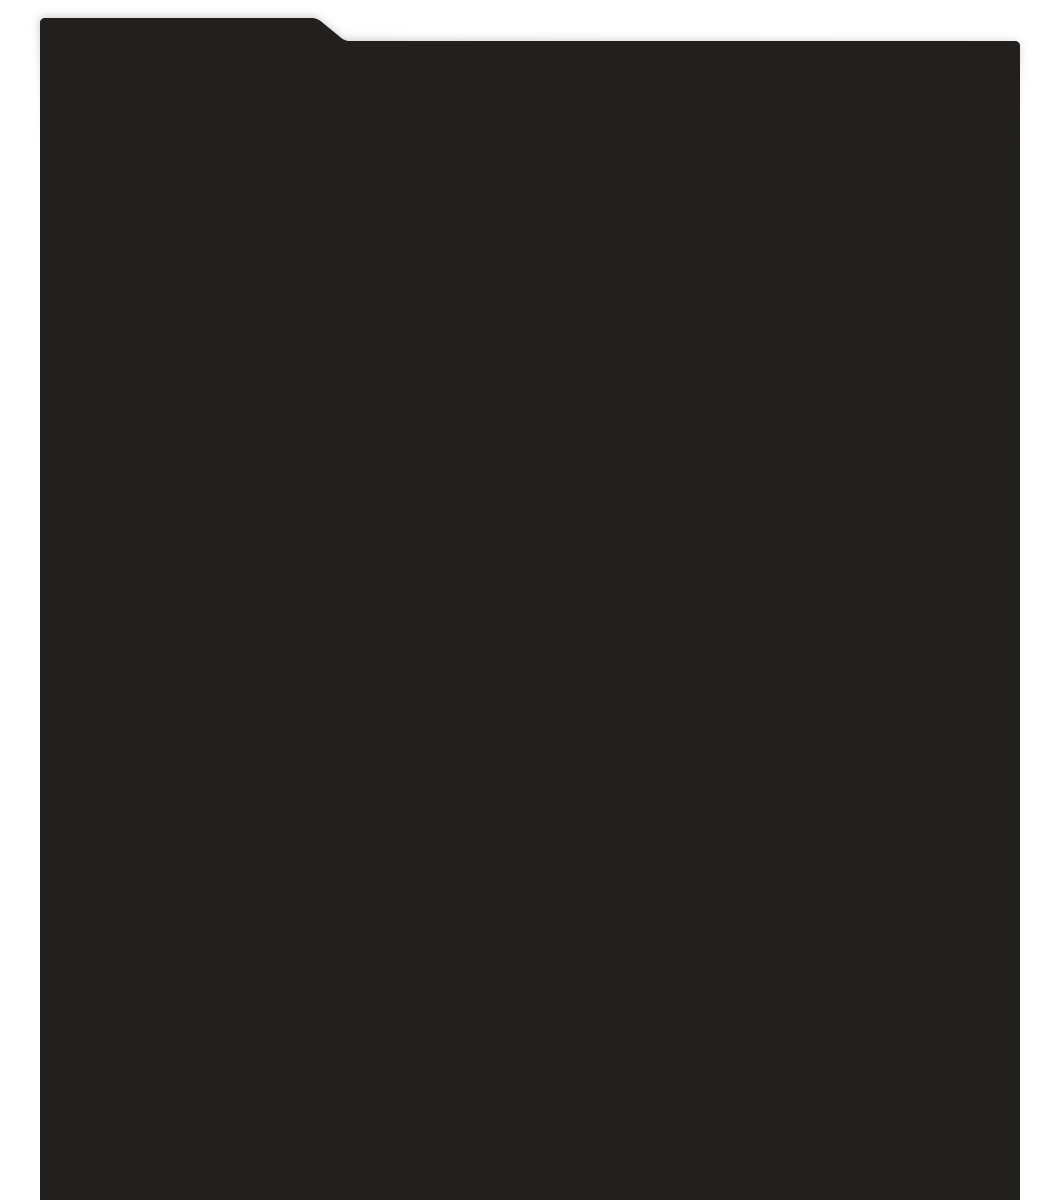
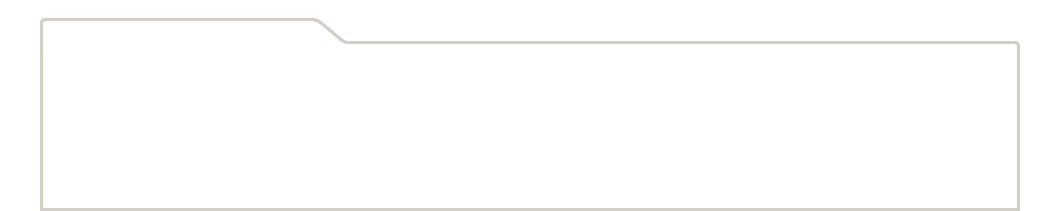
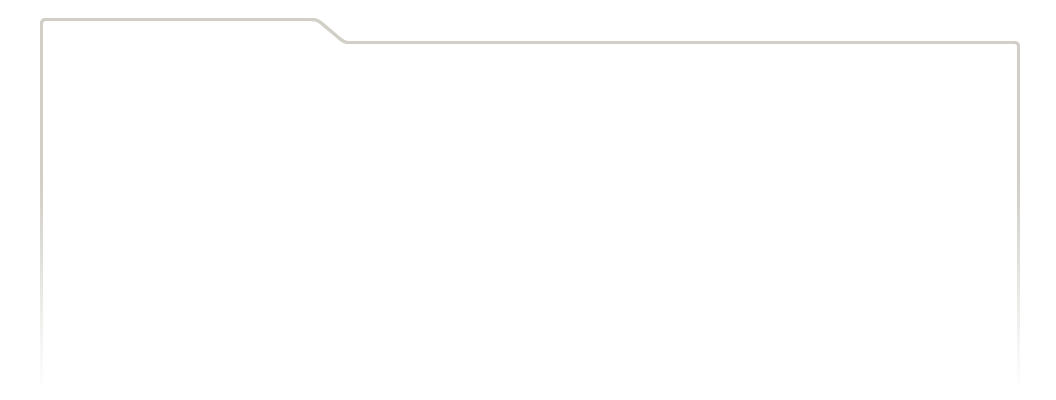
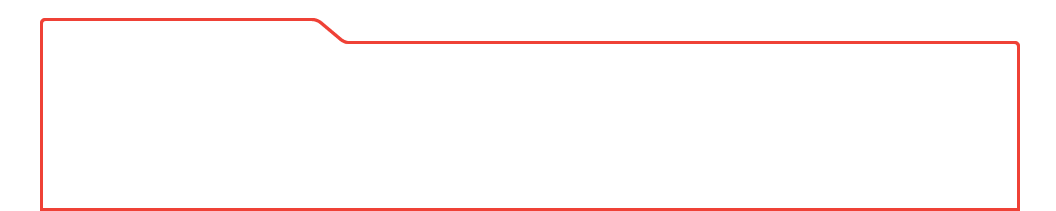
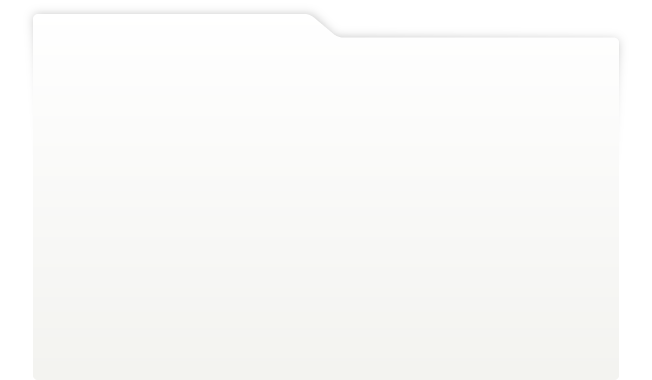
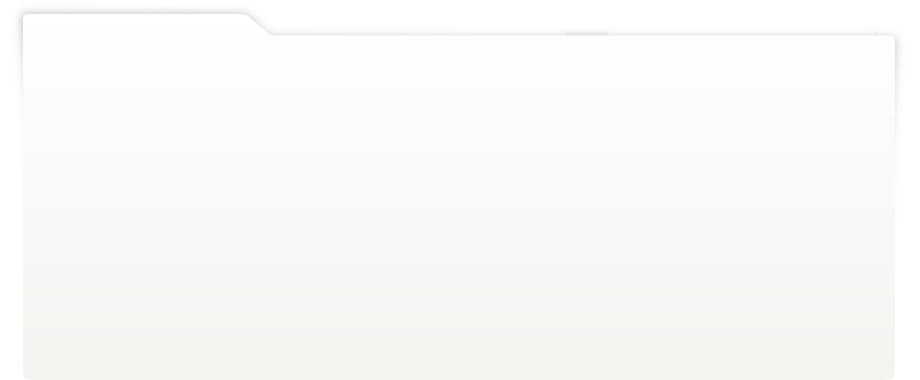
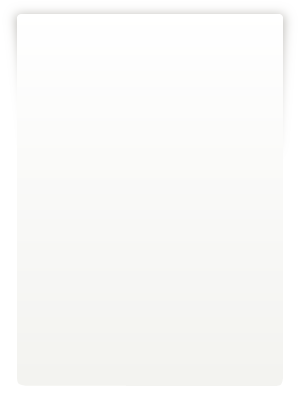
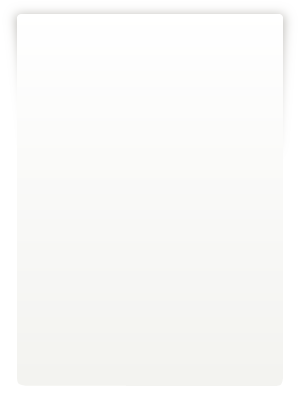
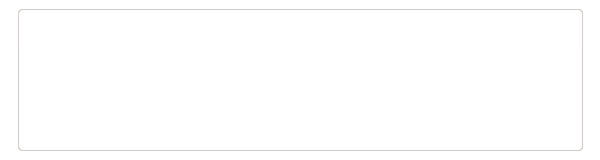
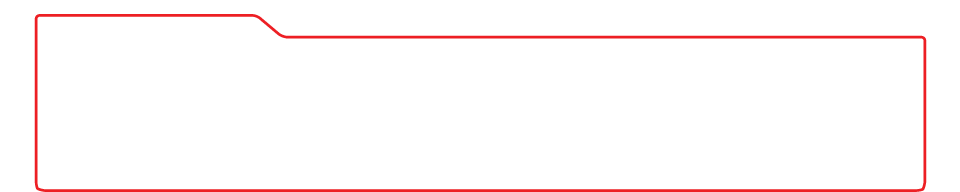
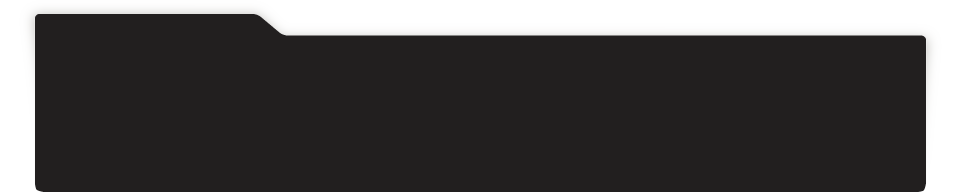
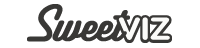
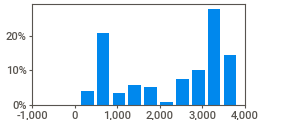
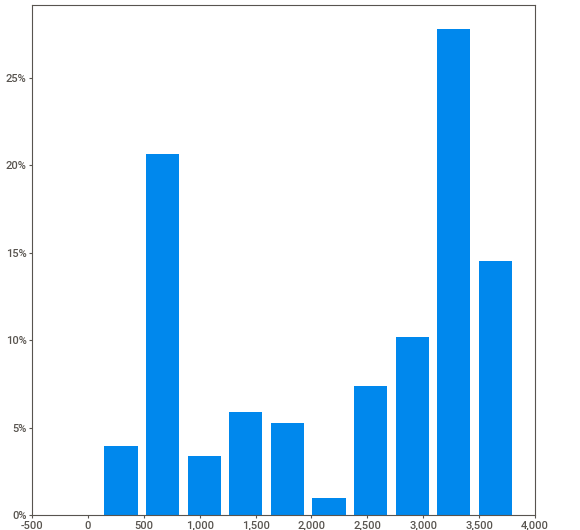
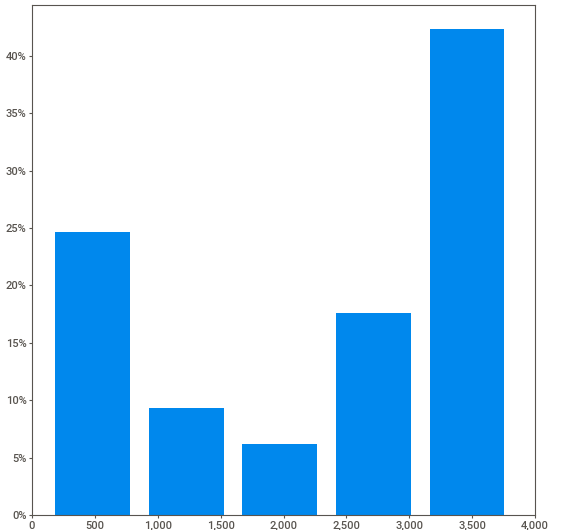
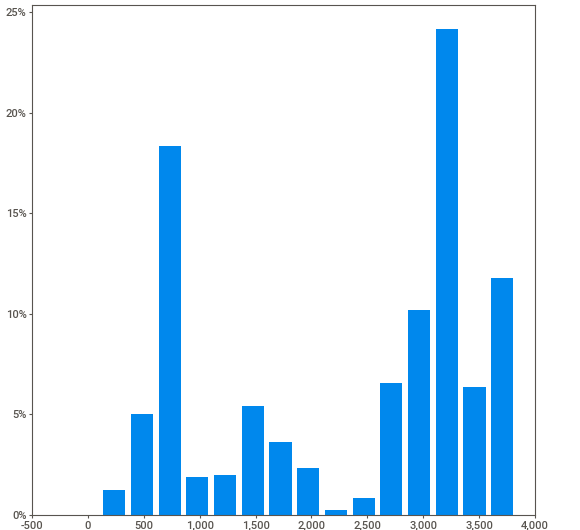
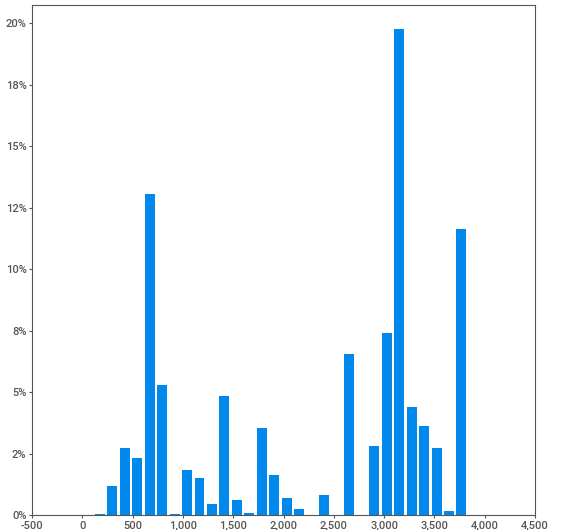
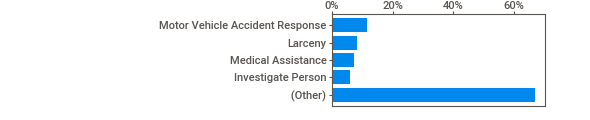
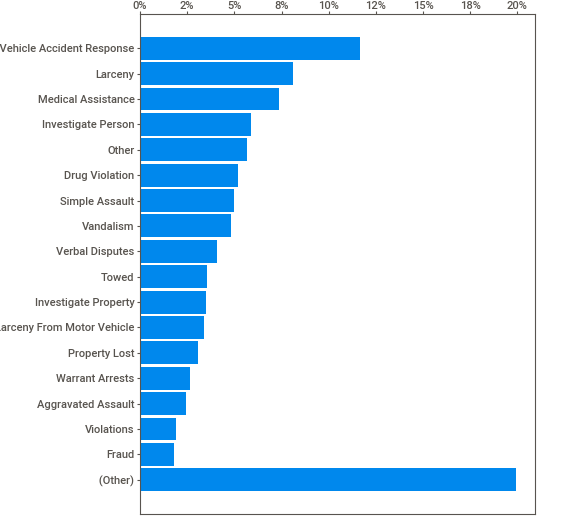
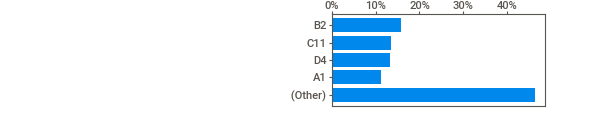
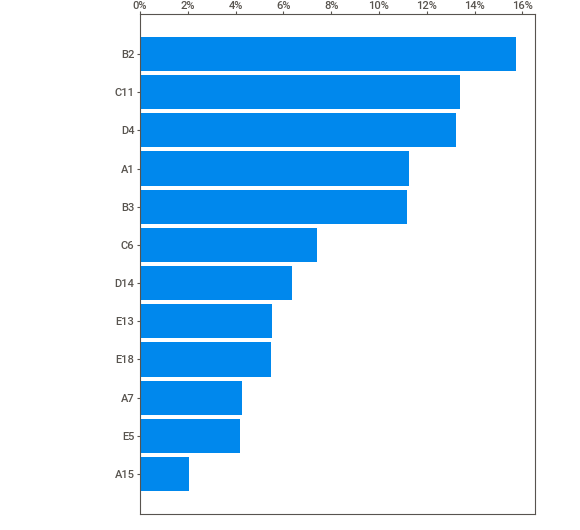
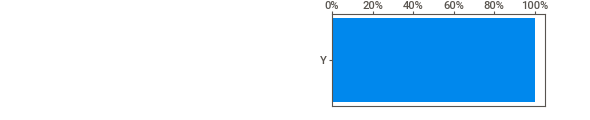
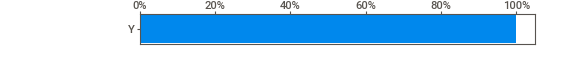
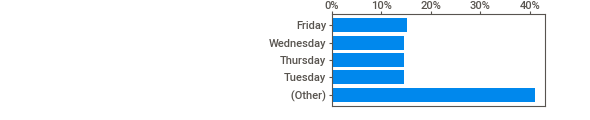
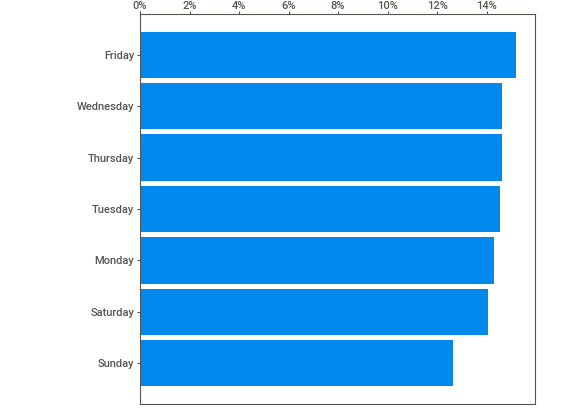
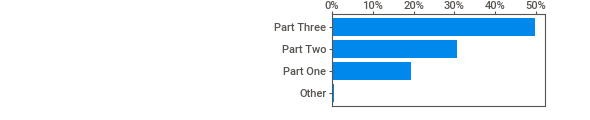
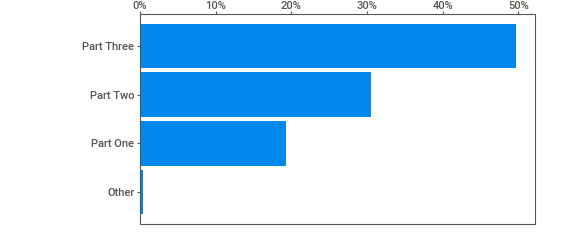
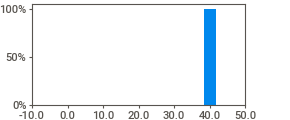
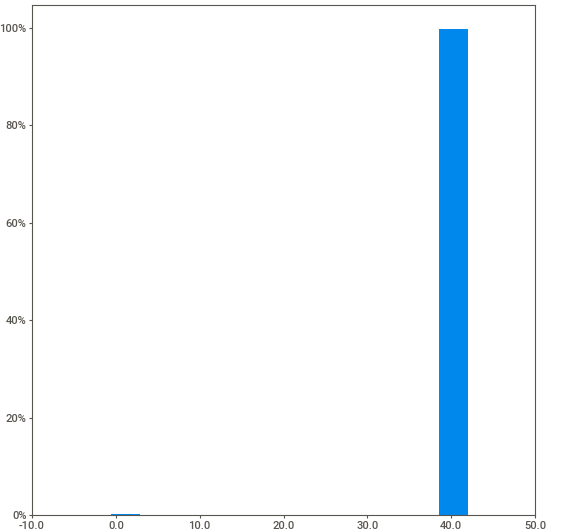
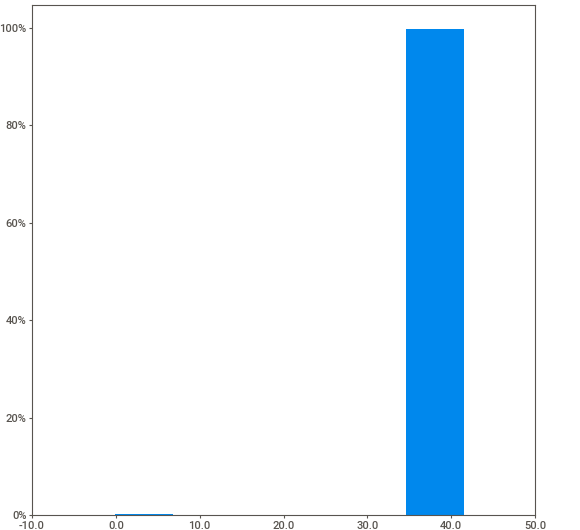
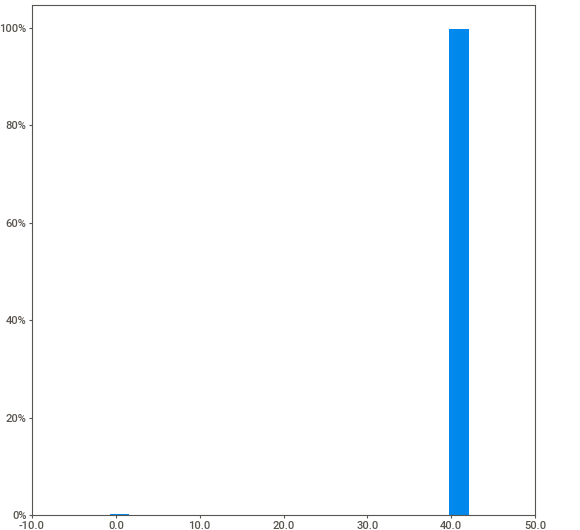
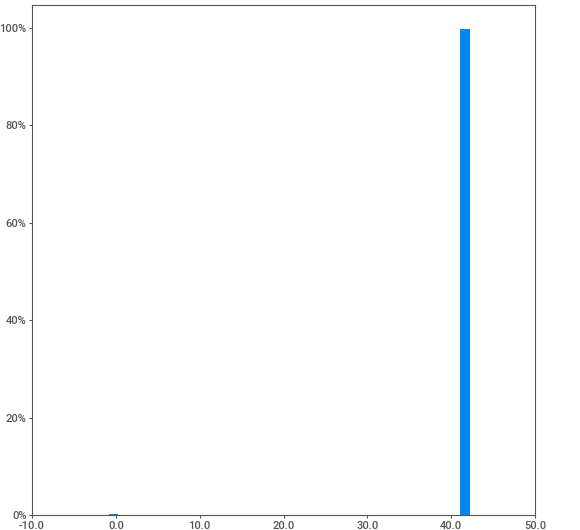
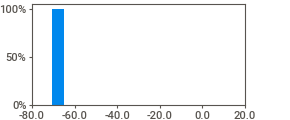
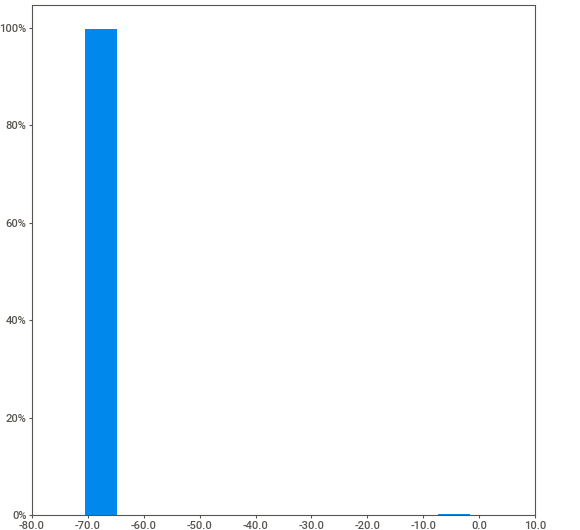
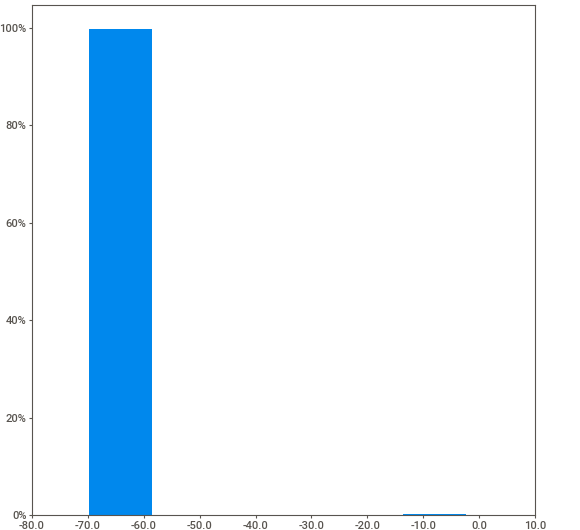
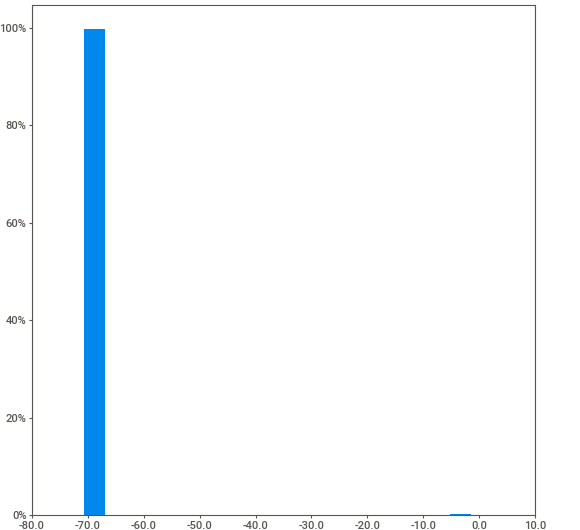
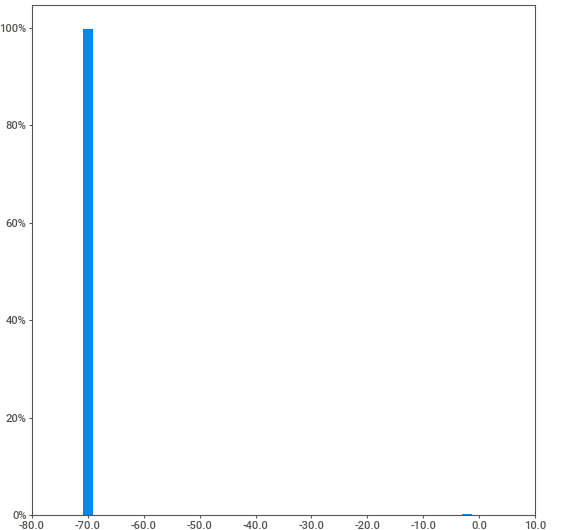
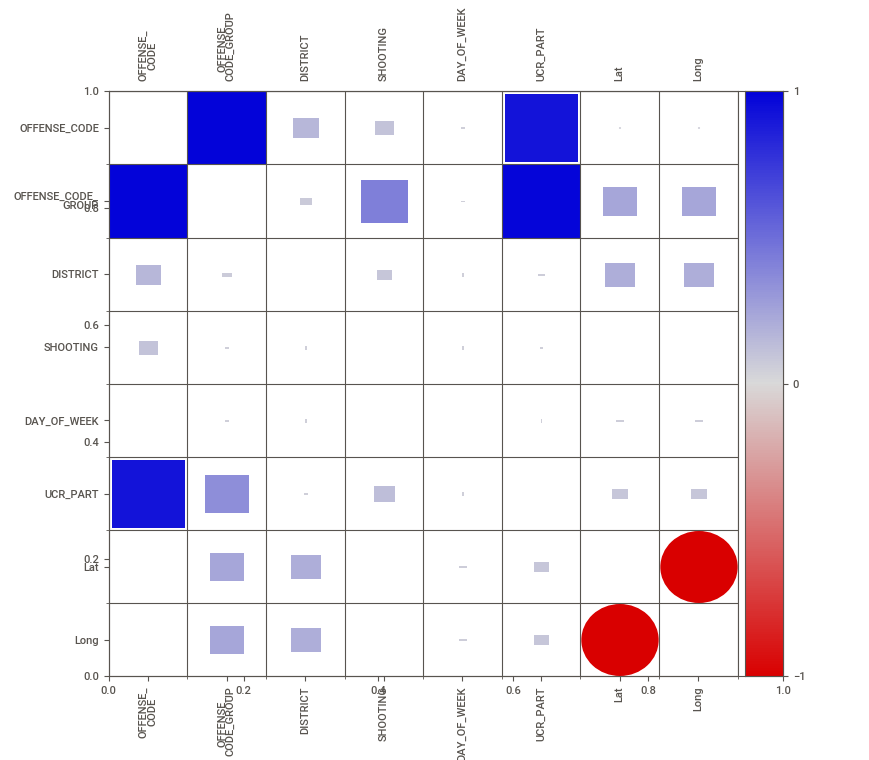
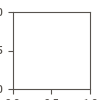

In [26]:
sweet_report = sv.analyze([CRIME,'Sweetviz Report'])
sweet_report.show_notebook()

In [27]:
CRIME.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   INCIDENT_NUMBER      319073 non-null  object 
 1   OFFENSE_CODE         319073 non-null  int64  
 2   OFFENSE_CODE_GROUP   319073 non-null  object 
 3   OFFENSE_DESCRIPTION  319073 non-null  object 
 4   DISTRICT             317308 non-null  object 
 5   REPORTING_AREA       319073 non-null  object 
 6   SHOOTING             1019 non-null    object 
 7   OCCURRED_ON_DATE     319073 non-null  object 
 8   DAY_OF_WEEK          319073 non-null  object 
 9   UCR_PART             318983 non-null  object 
 10  STREET               308202 non-null  object 
 11  Lat                  299074 non-null  float64
 12  Long                 299074 non-null  float64
 13  DESCRIPTION          319073 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 34.1+ MB


In [28]:

# Convert the 'OCCURRED_ON_DATE' column to datetime objects
CRIME['OCCURRED_ON_DATE'] = pd.to_datetime(CRIME['OCCURRED_ON_DATE'])


# Sort the DataFrame by year and month
CRIME_sorted = CRIME.sort_values(by=['OCCURRED_ON_DATE'])



In [29]:
CRIME_sorted

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Lat,Long,DESCRIPTION
129056,I172040657,2629,Harassment,HARASSMENT,C11,397,NaN,2015-06-15 00:00:00,Monday,Part Two,MELBOURNE ST,42.291093,-71.065945,NO DESCRIPTION
314676,I152054279,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,B3,456,NaN,2015-06-15 00:00:00,Monday,Part Two,HARLEM ST,42.300217,-71.080979,CREDIT CARD / ATM FRAUD
310350,I152059178,2647,Other,THREATS TO DO BODILY HARM,C11,359,NaN,2015-06-15 00:00:00,Monday,Part Two,WASHINGTON ST,42.293606,-71.071887,NO DESCRIPTION
253464,I162013546,3201,Property Lost,PROPERTY - LOST,B3,433,NaN,2015-06-15 00:00:00,Monday,Part Three,NORFOLK ST,42.283634,-71.082813,LOST
8793,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,,NaN,2015-06-15 00:00:00,Monday,Part Three,BERNARD,-1.000000,-1.000000,LOST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,Monday,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,STREET
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,Monday,Part Three,DELHI ST,42.275365,-71.090361,NO DESCRIPTION
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,Monday,Part Three,TALBOT AVE,42.290196,-71.071590,INJURY
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,Monday,Part Three,NEWCOMB ST,42.334182,-71.078664,NO DESCRIPTION


In [30]:

# Replace NaN values in the 'SHOOTING' column with 'N'
CRIME_sorted['SHOOTING'].fillna('N', inplace=True)

<ipython-input-30-cf23ff651738>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CRIME_sorted['SHOOTING'].fillna('N', inplace=True)


In [31]:
CRIME_sorted.isnull().sum()

,0
INCIDENT_NUMBER,0
OFFENSE_CODE,0
OFFENSE_CODE_GROUP,0
OFFENSE_DESCRIPTION,0
DISTRICT,1765
REPORTING_AREA,0
SHOOTING,0
OCCURRED_ON_DATE,0
DAY_OF_WEEK,0
UCR_PART,90


In [32]:
# Create an IterativeImputer object
imputer = IterativeImputer(max_iter=50, random_state=0)

# Select columns for imputation (exclude non-numeric and datetime columns)
cols_to_impute = CRIME_sorted.select_dtypes(include=np.number).columns

# Fit and transform the imputer on the selected columns
CRIME_imputed = CRIME_sorted.copy()  # Create a copy to avoid modifying the original
CRIME_imputed[cols_to_impute] = imputer.fit_transform(CRIME_sorted[cols_to_impute])

# Display the DataFrame with imputed values
CRIME_imputed.isnull().sum()

,0
INCIDENT_NUMBER,0
OFFENSE_CODE,0
OFFENSE_CODE_GROUP,0
OFFENSE_DESCRIPTION,0
DISTRICT,1765
REPORTING_AREA,0
SHOOTING,0
OCCURRED_ON_DATE,0
DAY_OF_WEEK,0
UCR_PART,90


In [33]:

# Fill NaN values in 'DISTRICT', 'UCR_PART', and 'STREET' columns with their respective modes.
CRIME_imputed['DISTRICT'].fillna(CRIME_imputed['DISTRICT'].mode()[0], inplace=True)
CRIME_imputed['UCR_PART'].fillna(CRIME_imputed['UCR_PART'].mode()[0], inplace=True)
CRIME_imputed['STREET'].fillna(CRIME_imputed['STREET'].mode()[0], inplace=True)

# Display the updated DataFrame
CRIME_imputed.isnull().sum()

<ipython-input-33-d636ad174e6e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CRIME_imputed['DISTRICT'].fillna(CRIME_imputed['DISTRICT'].mode()[0], inplace=True)
<ipython-input-33-d636ad174e6e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

,0
INCIDENT_NUMBER,0
OFFENSE_CODE,0
OFFENSE_CODE_GROUP,0
OFFENSE_DESCRIPTION,0
DISTRICT,0
REPORTING_AREA,0
SHOOTING,0
OCCURRED_ON_DATE,0
DAY_OF_WEEK,0
UCR_PART,0


In [34]:
street_to_district = CRIME_imputed.groupby('STREET')['DISTRICT'].agg(lambda x: x.mode()[0]).to_dict()

In [35]:
street_to_ucr = CRIME_imputed.groupby('STREET')['UCR_PART'].agg(lambda x: x.mode()[0]).to_dict()

In [36]:
def get_district_from_street(street_name):
    """
    Returns the district for a given street name.

    Args:
        street_name (str): The name of the street.

    Returns:
        str: The district corresponding to the street name.
             Returns None if the street name is not found.
    """
    district = street_to_district.get(street_name)
    if district is None:
        return "District not found for this street."
    else:
        return district

In [37]:
def get_ucr_from_street(street_name):
    """
    Returns the district for a given street name.

    Args:
        street_name (str): The name of the street.

    Returns:
        str: The district corresponding to the street name.
             Returns None if the street name is not found.
    """
    ucr = street_to_ucr.get(street_name)
    if ucr is None:
        return "District not found for this street."
    else:
        return ucr

In [38]:
street_name = "WASHINGTON ST"  # Replace with the desired street name
district = get_district_from_street(street_name)
print(f"The district for {street_name} is: {district}")

The district for WASHINGTON ST is: B2


In [39]:
# Apply the function to the 'DISTRICT' column
CRIME_imputed['DISTRICT'] = CRIME_imputed['STREET'].apply(get_district_from_street)

In [40]:
# Apply the function to the 'DISTRICT' column
CRIME_imputed['UCR_PART'] = CRIME_imputed['STREET'].apply(get_ucr_from_street)

In [41]:
CRIME_imputed

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Lat,Long,DESCRIPTION
129056,I172040657,2629.0,Harassment,HARASSMENT,C11,397,N,2015-06-15 00:00:00,Monday,Part Three,MELBOURNE ST,42.291093,-71.065945,NO DESCRIPTION
314676,I152054279,1106.0,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,B3,456,N,2015-06-15 00:00:00,Monday,Part Three,HARLEM ST,42.300217,-71.080979,CREDIT CARD / ATM FRAUD
310350,I152059178,2647.0,Other,THREATS TO DO BODILY HARM,B2,359,N,2015-06-15 00:00:00,Monday,Part Three,WASHINGTON ST,42.293606,-71.071887,NO DESCRIPTION
253464,I162013546,3201.0,Property Lost,PROPERTY - LOST,B3,433,N,2015-06-15 00:00:00,Monday,Part Three,NORFOLK ST,42.283634,-71.082813,LOST
8793,I182061268,3201.0,Property Lost,PROPERTY - LOST,B2,,N,2015-06-15 00:00:00,Monday,Part Three,BERNARD,-1.000000,-1.000000,LOST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,I182070931,301.0,Robbery,ROBBERY - STREET,D4,177,N,2018-09-03 20:48:00,Monday,Part Three,MASSACHUSETTS AVE,42.331521,-71.070853,STREET
4,I182070938,3114.0,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,Monday,Part Three,DELHI ST,42.275365,-71.090361,NO DESCRIPTION
5,I182070936,3820.0,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,B3,398,N,2018-09-03 21:09:00,Monday,Part Three,TALBOT AVE,42.290196,-71.071590,INJURY
3,I182070940,3114.0,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,Monday,Part One,NEWCOMB ST,42.334182,-71.078664,NO DESCRIPTION


In [42]:
# Define a function to identify outliers based on IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Remove outliers from 'Lat' and 'Long' columns
CRIME_no_outliers = remove_outliers_iqr(CRIME_imputed, 'Lat')
CRIME_no_outliers = remove_outliers_iqr(CRIME_no_outliers, 'Long')

# Display the DataFrame with outliers removed
CRIME_no_outliers

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Lat,Long,DESCRIPTION
129056,I172040657,2629.0,Harassment,HARASSMENT,C11,397,N,2015-06-15 00:00:00,Monday,Part Three,MELBOURNE ST,42.291093,-71.065945,NO DESCRIPTION
314676,I152054279,1106.0,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,B3,456,N,2015-06-15 00:00:00,Monday,Part Three,HARLEM ST,42.300217,-71.080979,CREDIT CARD / ATM FRAUD
310350,I152059178,2647.0,Other,THREATS TO DO BODILY HARM,B2,359,N,2015-06-15 00:00:00,Monday,Part Three,WASHINGTON ST,42.293606,-71.071887,NO DESCRIPTION
253464,I162013546,3201.0,Property Lost,PROPERTY - LOST,B3,433,N,2015-06-15 00:00:00,Monday,Part Three,NORFOLK ST,42.283634,-71.082813,LOST
318414,I152049897,3201.0,Property Lost,PROPERTY - LOST,B2,282,N,2015-06-15 00:00:00,Monday,Part Three,WASHINGTON ST,42.328663,-71.085634,LOST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,I182070931,301.0,Robbery,ROBBERY - STREET,D4,177,N,2018-09-03 20:48:00,Monday,Part Three,MASSACHUSETTS AVE,42.331521,-71.070853,STREET
4,I182070938,3114.0,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,Monday,Part Three,DELHI ST,42.275365,-71.090361,NO DESCRIPTION
5,I182070936,3820.0,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,B3,398,N,2018-09-03 21:09:00,Monday,Part Three,TALBOT AVE,42.290196,-71.071590,INJURY
3,I182070940,3114.0,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,Monday,Part One,NEWCOMB ST,42.334182,-71.078664,NO DESCRIPTION


In [43]:

# Remove duplicate rows from the DataFrame
CRIME_no_duplicates = CRIME_no_outliers.drop_duplicates()

# Display the DataFrame with duplicates removed
CRIME_no_duplicates

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Lat,Long,DESCRIPTION
129056,I172040657,2629.0,Harassment,HARASSMENT,C11,397,N,2015-06-15 00:00:00,Monday,Part Three,MELBOURNE ST,42.291093,-71.065945,NO DESCRIPTION
314676,I152054279,1106.0,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,B3,456,N,2015-06-15 00:00:00,Monday,Part Three,HARLEM ST,42.300217,-71.080979,CREDIT CARD / ATM FRAUD
310350,I152059178,2647.0,Other,THREATS TO DO BODILY HARM,B2,359,N,2015-06-15 00:00:00,Monday,Part Three,WASHINGTON ST,42.293606,-71.071887,NO DESCRIPTION
253464,I162013546,3201.0,Property Lost,PROPERTY - LOST,B3,433,N,2015-06-15 00:00:00,Monday,Part Three,NORFOLK ST,42.283634,-71.082813,LOST
318414,I152049897,3201.0,Property Lost,PROPERTY - LOST,B2,282,N,2015-06-15 00:00:00,Monday,Part Three,WASHINGTON ST,42.328663,-71.085634,LOST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,I182070931,301.0,Robbery,ROBBERY - STREET,D4,177,N,2018-09-03 20:48:00,Monday,Part Three,MASSACHUSETTS AVE,42.331521,-71.070853,STREET
4,I182070938,3114.0,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,Monday,Part Three,DELHI ST,42.275365,-71.090361,NO DESCRIPTION
5,I182070936,3820.0,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,B3,398,N,2018-09-03 21:09:00,Monday,Part Three,TALBOT AVE,42.290196,-71.071590,INJURY
3,I182070940,3114.0,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,Monday,Part One,NEWCOMB ST,42.334182,-71.078664,NO DESCRIPTION


In [44]:

# Convert 'OFFENSE_CODE' to int, handling errors
CRIME_no_duplicates['OFFENSE_CODE'] = pd.to_numeric(CRIME_no_duplicates['OFFENSE_CODE'], errors='coerce').astype('Int64')

<ipython-input-44-c05215f0ac96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CRIME_no_duplicates['OFFENSE_CODE'] = pd.to_numeric(CRIME_no_duplicates['OFFENSE_CODE'], errors='coerce').astype('Int64')


In [45]:

# Display info of the cleaned dataset
CRIME_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285008 entries, 129056 to 6
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      285008 non-null  object        
 1   OFFENSE_CODE         285008 non-null  Int64         
 2   OFFENSE_CODE_GROUP   285008 non-null  object        
 3   OFFENSE_DESCRIPTION  285008 non-null  object        
 4   DISTRICT             285008 non-null  object        
 5   REPORTING_AREA       285008 non-null  object        
 6   SHOOTING             285008 non-null  object        
 7   OCCURRED_ON_DATE     285008 non-null  datetime64[ns]
 8   DAY_OF_WEEK          285008 non-null  object        
 9   UCR_PART             285008 non-null  object        
 10  STREET               285008 non-null  object        
 11  Lat                  285008 non-null  float64       
 12  Long                 285008 non-null  float64       
 13  DESCRIPTION        

In [46]:

# Calculate data quality metrics
completeness = (CRIME_no_duplicates.count().sum()) / (CRIME_no_duplicates.shape[0] * CRIME_no_duplicates.shape[1])
print(f"Completeness: {completeness:.2f}")

# Calculate the number of duplicates
duplicates = CRIME_no_duplicates.duplicated().sum()
print(f"Number of Duplicates: {duplicates}")

# Calculate the percentage of missing values for each column
missing_percentages = CRIME_no_duplicates.isnull().sum() / len(CRIME_no_duplicates) * 100
print("\nMissing Values Percentage per Column:\n", missing_percentages)

# You can add more metrics like consistency, validity, accuracy, etc.
# based on your specific requirements and data characteristics.
# For example, you might want to check the consistency of data types,
# the validity of values in specific columns, and the accuracy of
# numerical data.

# Display the updated DataFrame
CRIME_no_duplicates

Completeness: 1.00
Number of Duplicates: 0

Missing Values Percentage per Column:
 INCIDENT_NUMBER        0.0
OFFENSE_CODE           0.0
OFFENSE_CODE_GROUP     0.0
OFFENSE_DESCRIPTION    0.0
DISTRICT               0.0
REPORTING_AREA         0.0
SHOOTING               0.0
OCCURRED_ON_DATE       0.0
DAY_OF_WEEK            0.0
UCR_PART               0.0
STREET                 0.0
Lat                    0.0
Long                   0.0
DESCRIPTION            0.0
dtype: float64


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,UCR_PART,STREET,Lat,Long,DESCRIPTION
129056,I172040657,2629,Harassment,HARASSMENT,C11,397,N,2015-06-15 00:00:00,Monday,Part Three,MELBOURNE ST,42.291093,-71.065945,NO DESCRIPTION
314676,I152054279,1106,Confidence Games,FRAUD - CREDIT CARD / ATM FRAUD,B3,456,N,2015-06-15 00:00:00,Monday,Part Three,HARLEM ST,42.300217,-71.080979,CREDIT CARD / ATM FRAUD
310350,I152059178,2647,Other,THREATS TO DO BODILY HARM,B2,359,N,2015-06-15 00:00:00,Monday,Part Three,WASHINGTON ST,42.293606,-71.071887,NO DESCRIPTION
253464,I162013546,3201,Property Lost,PROPERTY - LOST,B3,433,N,2015-06-15 00:00:00,Monday,Part Three,NORFOLK ST,42.283634,-71.082813,LOST
318414,I152049897,3201,Property Lost,PROPERTY - LOST,B2,282,N,2015-06-15 00:00:00,Monday,Part Three,WASHINGTON ST,42.328663,-71.085634,LOST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,I182070931,301,Robbery,ROBBERY - STREET,D4,177,N,2018-09-03 20:48:00,Monday,Part Three,MASSACHUSETTS AVE,42.331521,-71.070853,STREET
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,N,2018-09-03 21:05:00,Monday,Part Three,DELHI ST,42.275365,-71.090361,NO DESCRIPTION
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,B3,398,N,2018-09-03 21:09:00,Monday,Part Three,TALBOT AVE,42.290196,-71.071590,INJURY
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,N,2018-09-03 21:16:00,Monday,Part One,NEWCOMB ST,42.334182,-71.078664,NO DESCRIPTION


In [47]:

# Generate descriptive statistics
print(CRIME_no_duplicates.describe())

# Analyze data types and missing values
print(CRIME_no_duplicates.info())

# Explore unique values in key columns
for col in ['OFFENSE_CODE', 'DISTRICT', 'UCR_PART', 'SHOOTING']:
    print(f"\nUnique values in '{col}':")
    print(CRIME_no_duplicates[col].unique())

# Calculate value counts for categorical features
for col in ['DISTRICT', 'UCR_PART', 'SHOOTING']:
    print(f"\nValue counts for '{col}':")
    print(CRIME_no_duplicates[col].value_counts())



       OFFENSE_CODE               OCCURRED_ON_DATE            Lat  \
count      285008.0                         285008  285008.000000   
mean    2289.115653  2017-01-22 20:05:40.297131776      42.322331   
min           111.0            2015-06-15 00:00:00      42.232413   
25%           802.0            2016-04-07 00:00:00      42.298392   
50%          2906.0            2017-01-25 13:58:00      42.325224   
75%          3201.0            2017-11-04 13:59:15      42.348389   
max          3831.0            2018-09-03 21:25:00      42.395042   
std     1184.339352                            NaN       0.031488   

                Long  
count  285008.000000  
mean      -71.079863  
min       -71.148132  
25%       -71.093673  
50%       -71.076381  
75%       -71.062044  
max       -71.007383  
std         0.025557  
<class 'pandas.core.frame.DataFrame'>
Index: 285008 entries, 129056 to 6
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  --

In [50]:

CRIME_no_duplicates.to_csv('CRIME_CLEAN.csv', index=False)

In [55]:
OFFENCE_CODES.to_csv('CODE_CLEAN.csv', index=False)

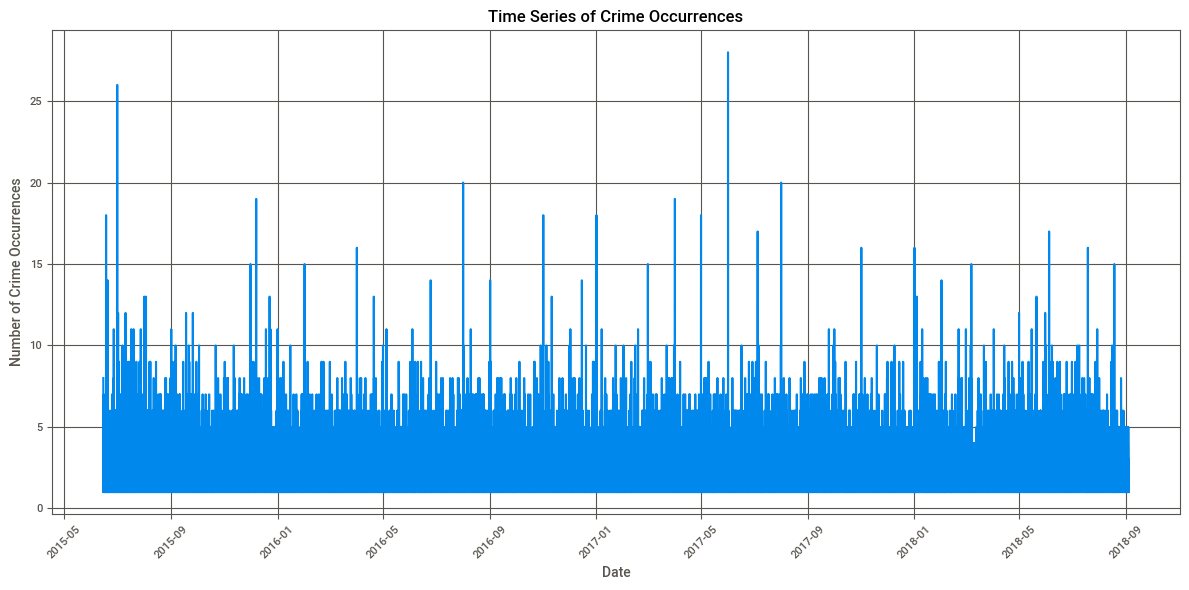

In [54]:

import pandas as pd
import matplotlib.pyplot as plt

# Assuming CRIME_no_duplicates is your cleaned DataFrame (from the previous code)
# Load the cleaned data
CRIME_no_duplicates = pd.read_csv('CRIME_CLEAN.csv')

# Convert 'OCCURRED_ON_DATE' to datetime objects if it's not already
CRIME_no_duplicates['OCCURRED_ON_DATE'] = pd.to_datetime(CRIME_no_duplicates['OCCURRED_ON_DATE'])

# Group by date and count the occurrences
crime_counts = CRIME_no_duplicates.groupby('OCCURRED_ON_DATE').size().reset_index(name='Crime Occurrences')


# Create the time series plot
plt.figure(figsize=(12, 6))
plt.plot(crime_counts['OCCURRED_ON_DATE'], crime_counts['Crime Occurrences'])
plt.xlabel('Date')
plt.ylabel('Number of Crime Occurrences')
plt.title('Time Series of Crime Occurrences')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

                                             |          | [  0%]   00:00 -> (? left)


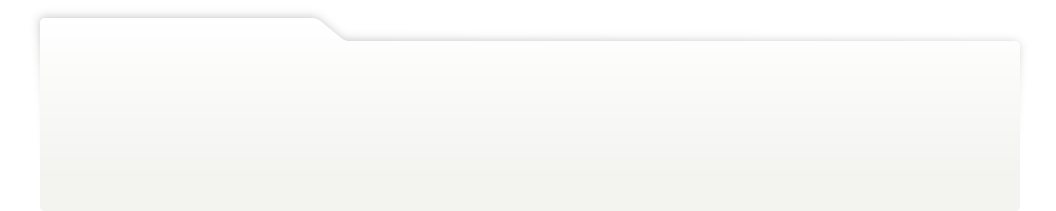
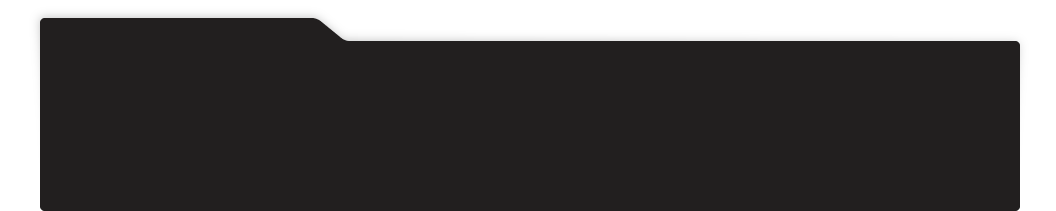
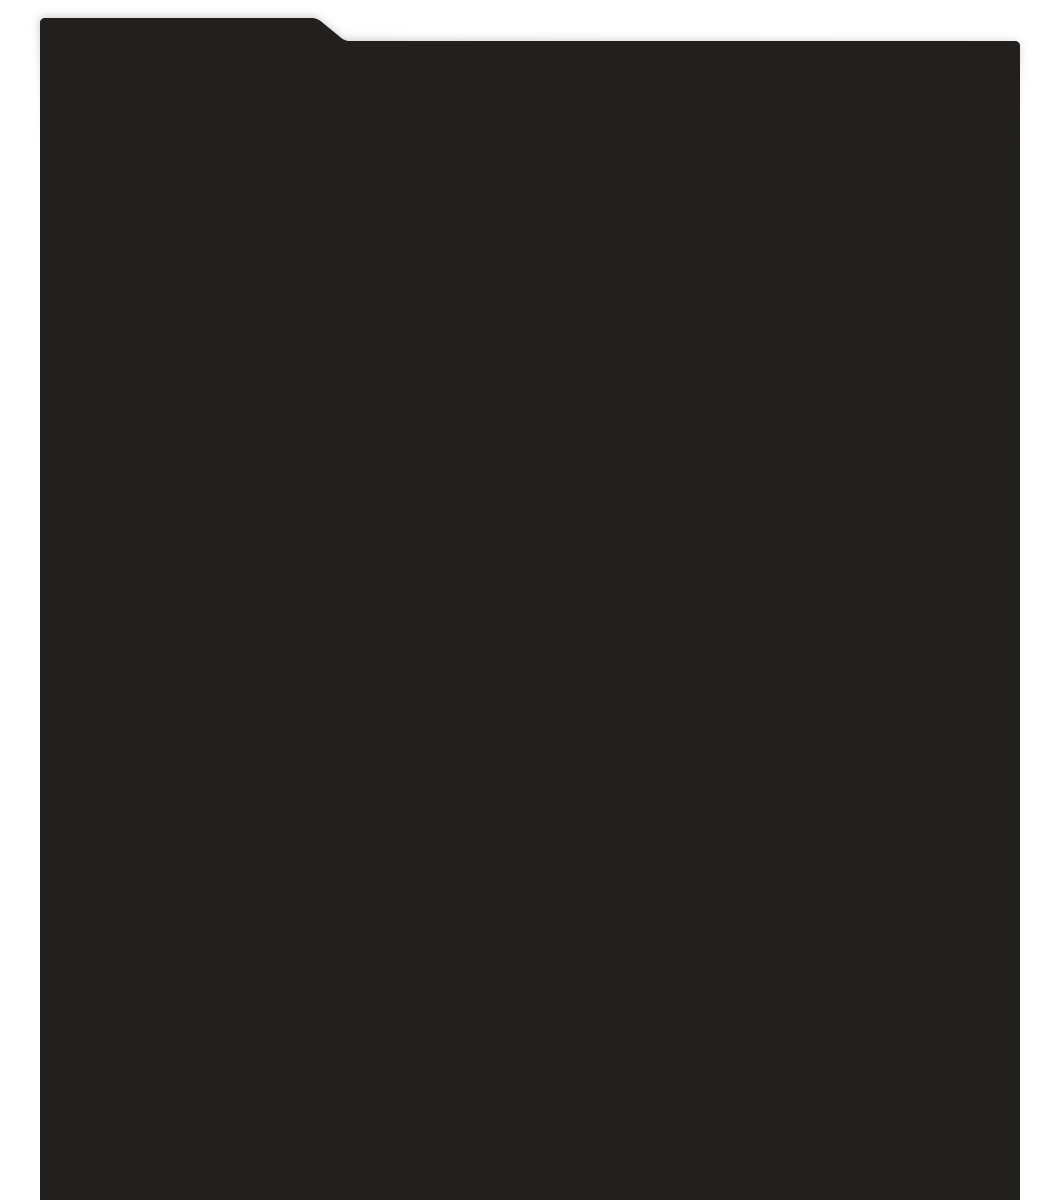
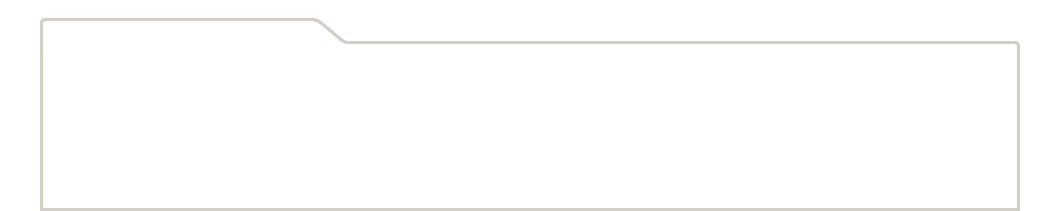
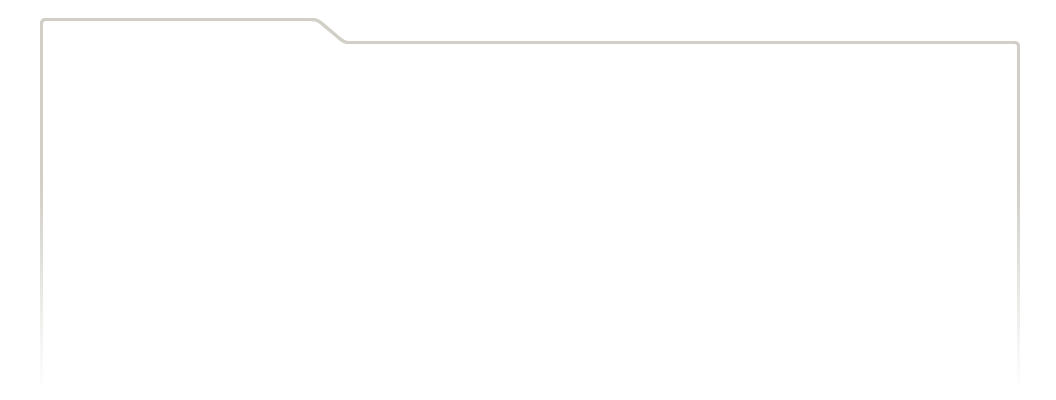
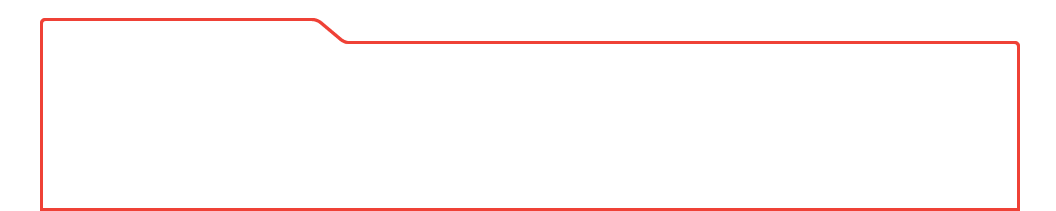
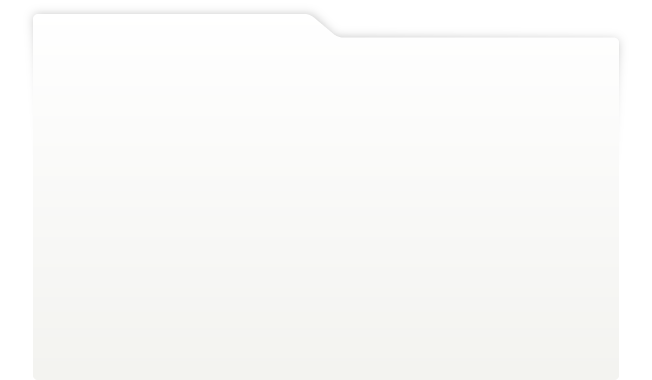
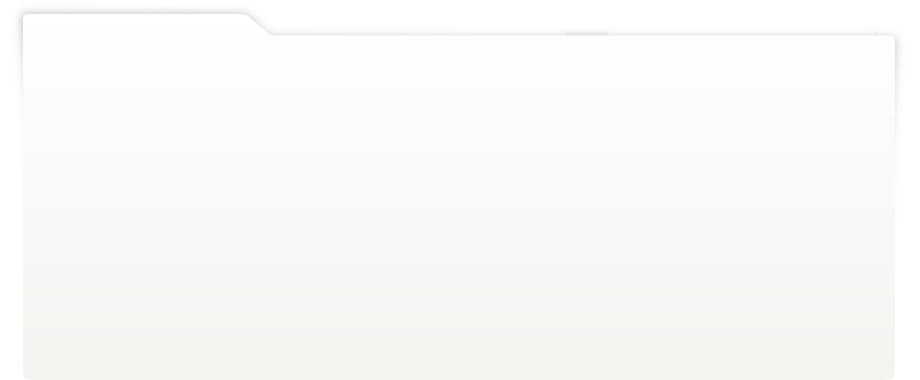
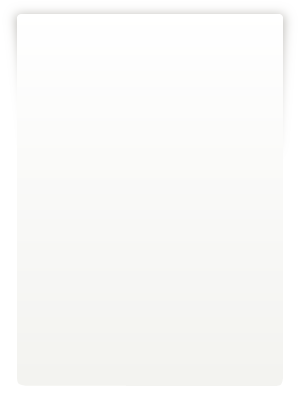
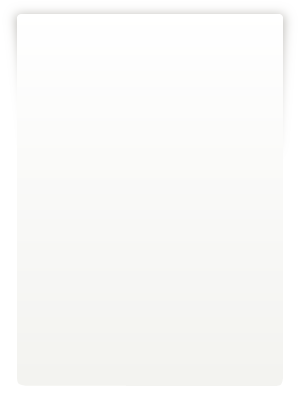
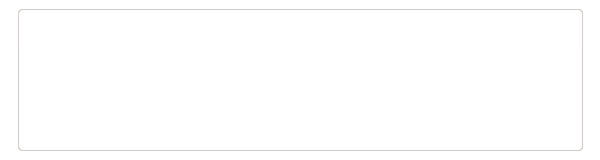
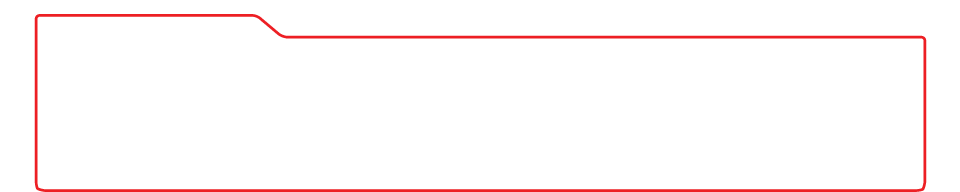
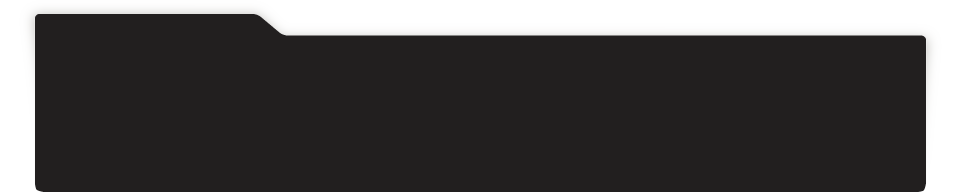
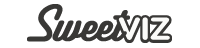
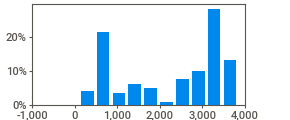
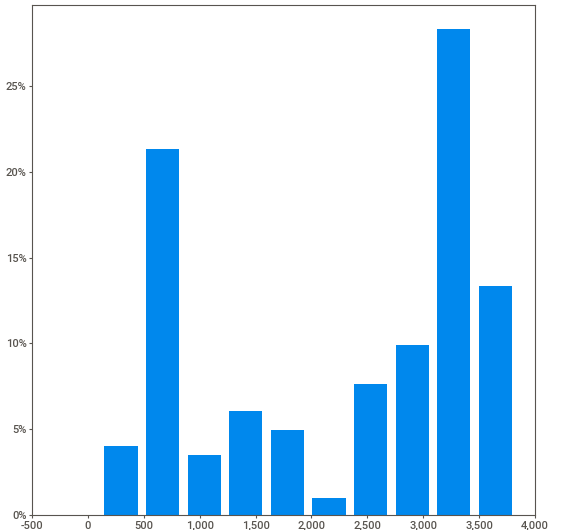
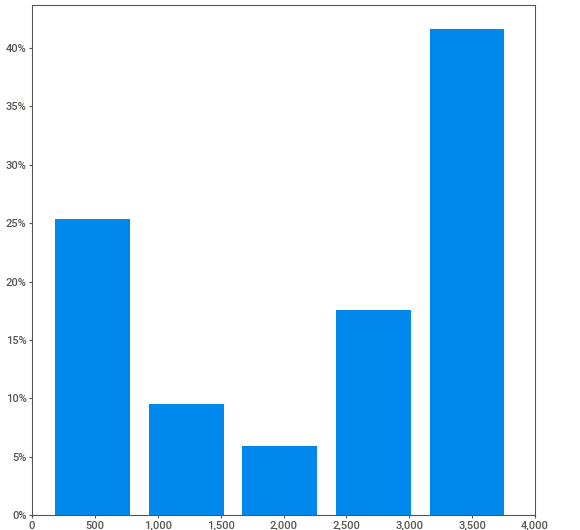
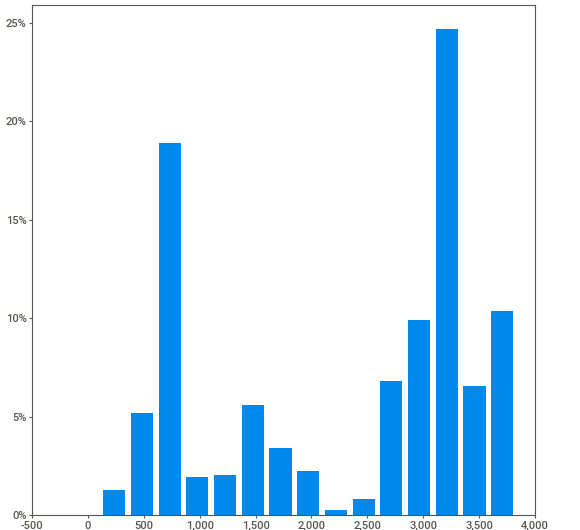
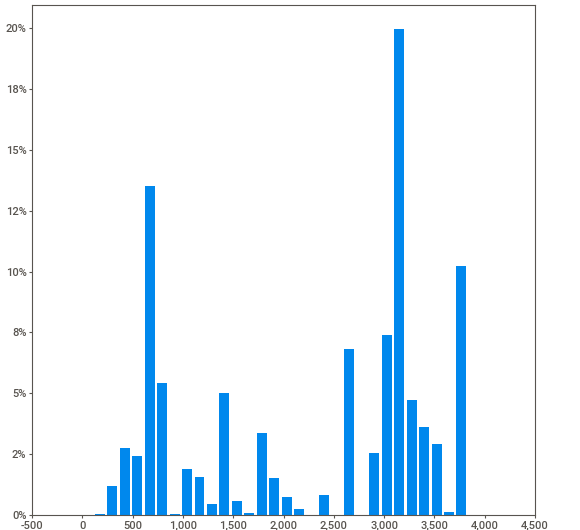
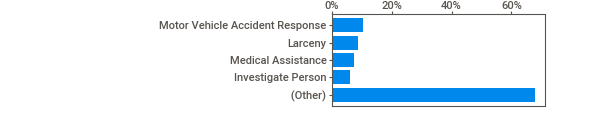
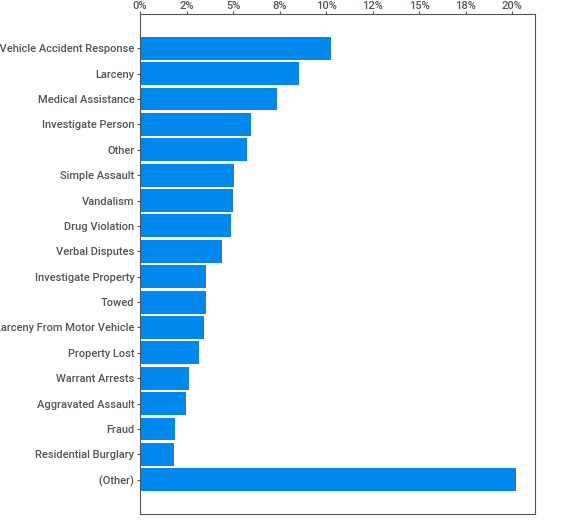
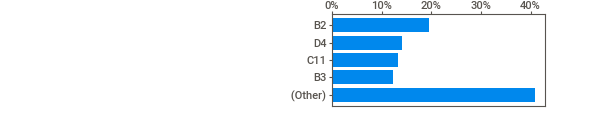
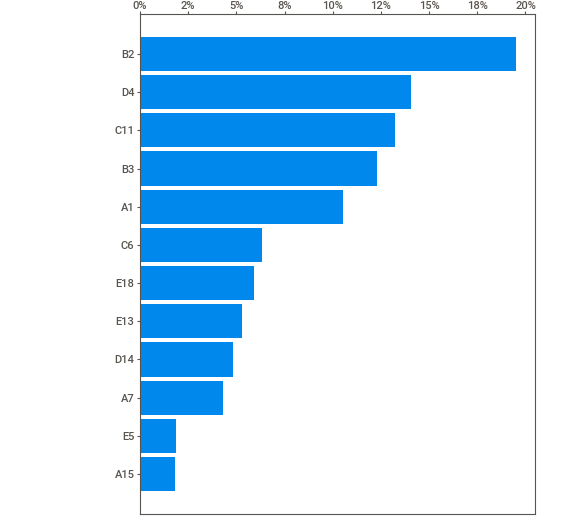
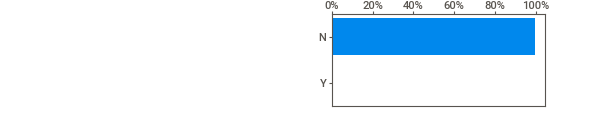
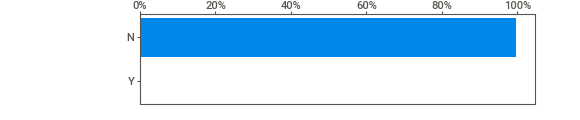
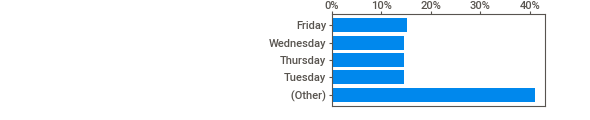
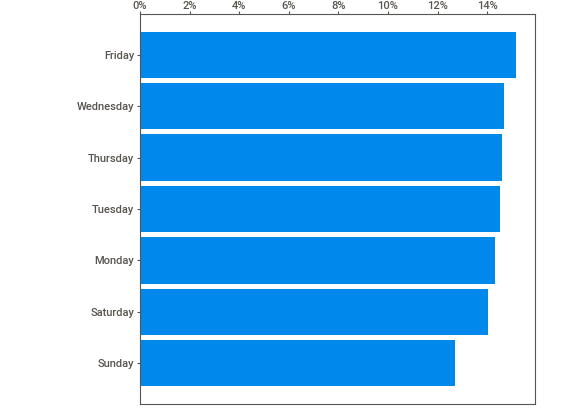
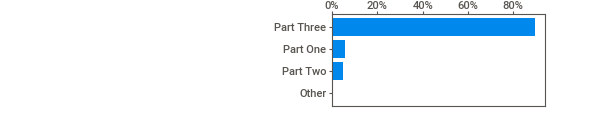
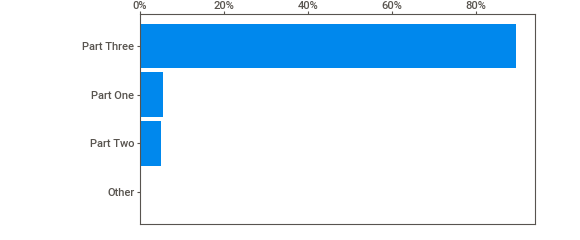
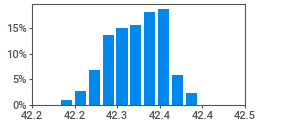
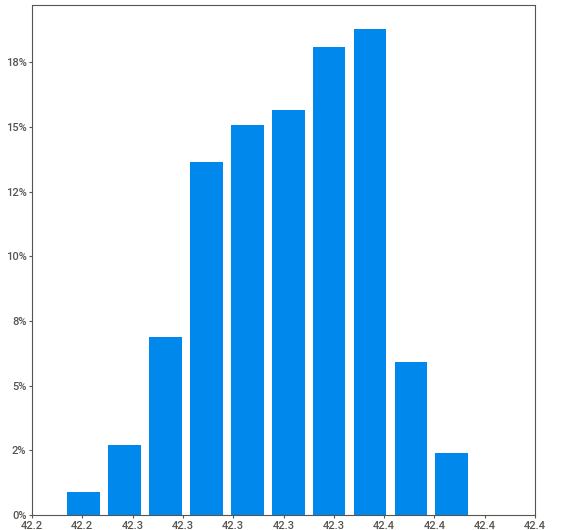
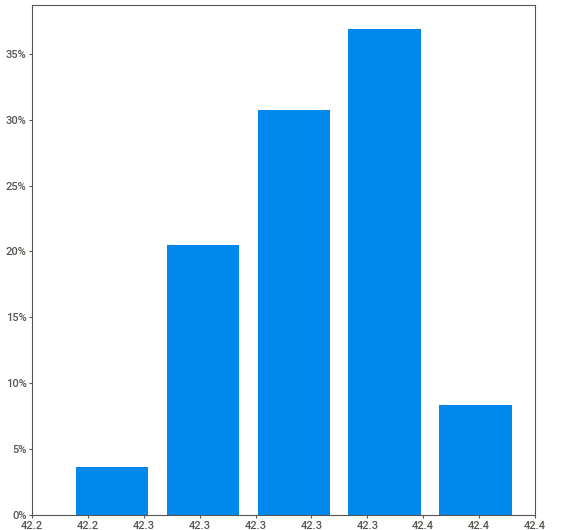
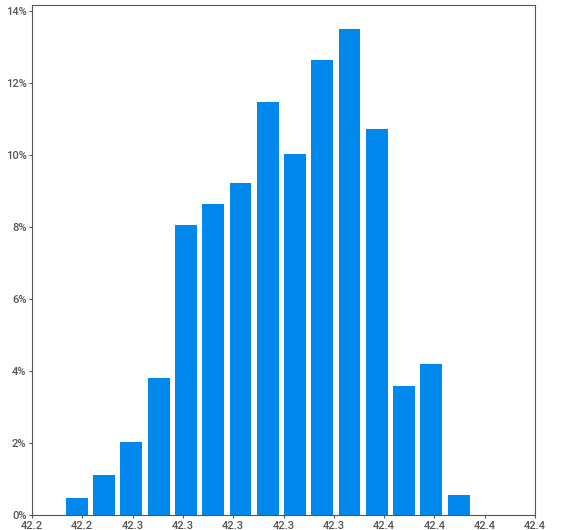
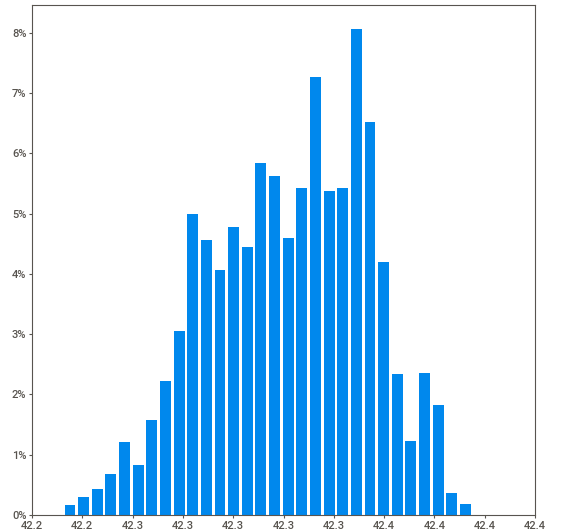
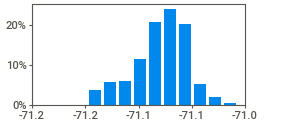
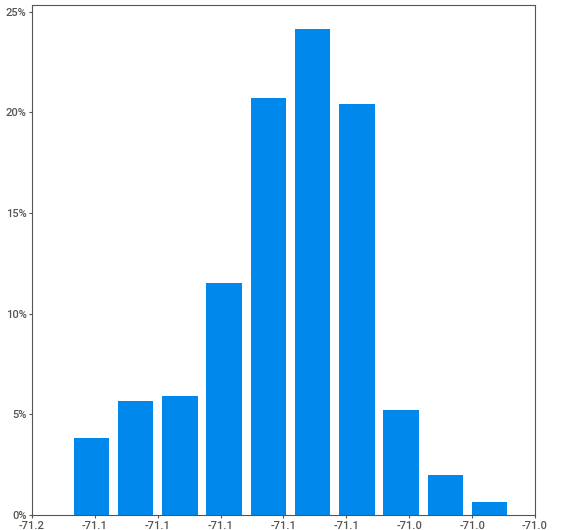
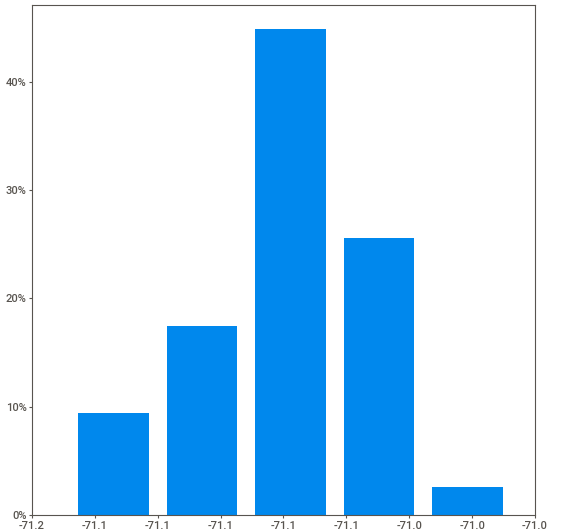
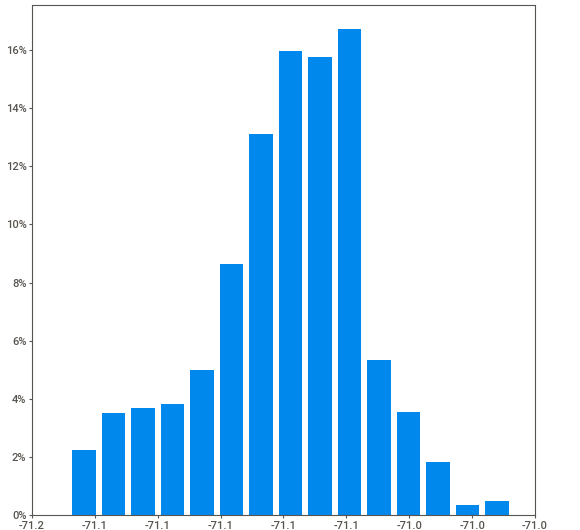
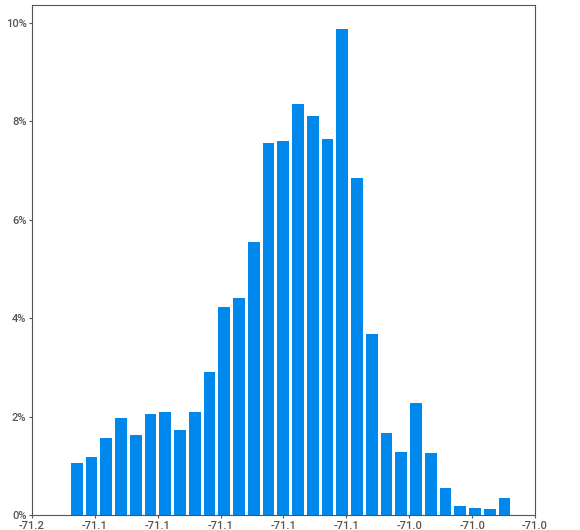
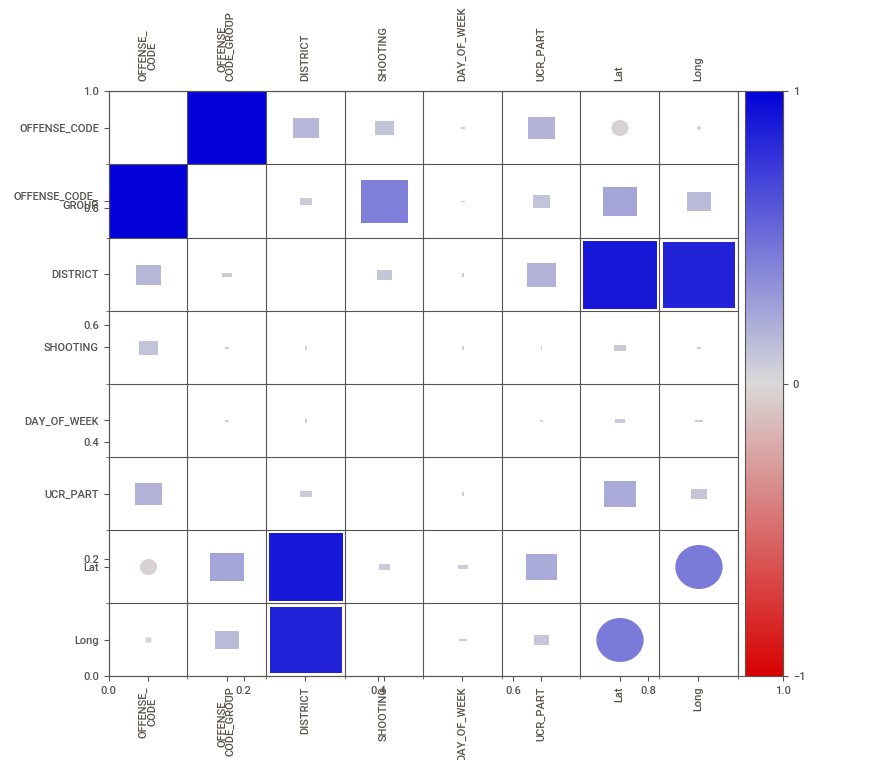
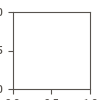

In [53]:
sweet_report = sv.analyze([CRIME_no_duplicates,'Sweetviz Report'])
sweet_report.show_notebook()

In [ ]:

import pandas as pd
import folium

# Load the cleaned crime data
crime_data = pd.read_csv('CRIME_CLEAN.csv')

# Create a map centered around the mean latitude and longitude
map_center = [crime_data['Lat'].mean(), crime_data['Long'].mean()]
crime_map = folium.Map(location=map_center, zoom_start=10)

# Add crime markers to the map
for index, row in crime_data.iterrows():
    folium.CircleMarker(
        location=[row['Lat'], row['Long']],
        radius=3,  # Adjust the radius as needed
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"Crime Type: {row['DESCRIPTION']}"
    ).add_to(crime_map)

# Display the map
crime_map